<a href="https://colab.research.google.com/github/PhaneendraYedidi/Machine-Learning-Practices/blob/master/06_Implement_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy.random import seed
from numpy.random import rand
from random import shuffle

In [ ]:
X = load_boston().data
Y = load_boston().target

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
clf = SGDRegressor(learning_rate='constant')
clf.fit(X, Y)
MSE_SK = mean_squared_error(Y, clf.predict(X))
print('***SKLearn SGDRegressor***')
print('Mean Square Error',str(MSE_SK))
W_SK = clf.coef_
print('Weights (Coeff)')
print(W_SK)
B_SK= clf.intercept_
print('Intercept')
print(B_SK)

***SKLearn SGDRegressor***
Mean Square Error 22.826342096650734
Weights (Coeff)
[-0.59281721  0.91821328  0.03196809  1.06527052 -2.27663127  3.3620858
 -0.04924001 -3.17398408  2.65092003 -1.96118207 -1.94617025  0.4749296
 -3.37895721]
Intercept
[22.87804839]


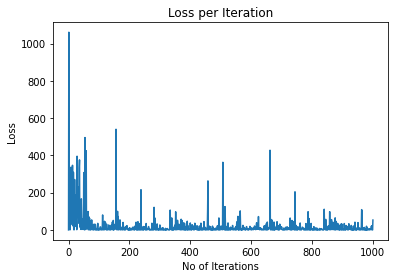

***Custom SGDRegressor***
Mean Square Error 23.357271081718803
Weights (Coeff)
[-1.52905249  1.50003763 -0.65093353  0.18767256 -1.83510079  2.85832822
 -0.03796133 -2.97016679  1.83269596 -1.11302414 -1.94848514  0.36924265
 -3.27025186]
Intercept
22.521576654385957


In [ ]:
class SGDImplementation:
  def __init__(self):
    seed(10)
    self.lambda_Value = 0.0001 #SGDRegularizer default alpha
    self.coef_ = self.wOld = rand(13) # X is 13 dimensional
    self.intercept_ = self.bOld = rand()
    
  def fit(self,X, Y):
    #Shuffle the data
    X,Y = self.randomShuffle(X,Y)

    #Set hyperparameters
    l = 0.01# learning rate when learning_rate='constant'... eta = eta0 ... eta0=0.01
    loss_List = [0]
    loss_Per_List = [0]
    l_list = []

    for i in range(1000):
      l_list.append(l)
      X_Sam, Y_Sam = self.getBatchSamples(X,Y,1,i)
      wNew = self.wOld - (l*self.dldw(X_Sam,Y_Sam,self.wOld,self.bOld))
      bNew = self.bOld - (l*self.dldb(X_Sam,Y_Sam,self.wOld,self.bOld))
      lNew = self.lNew(X_Sam,Y_Sam,wNew,bNew)
      loss_Per = ((loss_List[-1] - lNew + 0.00001)/(loss_List[-1] + 0.00001)) * 100
      loss_List.append(lNew)
      loss_Per_List.append(loss_Per)
      self.wOld = wNew # useful for next iteration
      self.bOld = bNew
      
      # update learning rate
      #l = self.updateL(l,i)
      if abs(loss_Per) < 0.1:
        print('breaked')
        break

    self.coef_ = self.wOld
    self.intercept_ = self.bOld
    
    plt.plot(loss_List)
    plt.xlabel('No of Iterations')
    plt.ylabel('Loss')
    plt.title('Loss per Iteration')
    plt.show()


  def predict(self,X):
    return X.dot(self.wOld) + self.bOld
    #return self.wOld.dot(X) + self.bOld

  def randomShuffle(self,X,Y):
    #https://pynative.com/python-random-shuffle/
    dTrain = list(zip(X,Y))
    shuffle(dTrain)
    X_New, Y_New = zip(*dTrain)
    return X_New, Y_New
  
  def getBatchSamples(self,X,Y,k,i):
    #k - number of items to select
    #i - iteration number
    j = i
    if i >= len(Y)/k: #if i*k is more than list of elements then modulus of  "i %= int(len(Y)/k)"" is used to select already selected values
      j = j % int(len(Y)/k)
    dTrain = list(zip(X,Y))
    sample = dTrain[j*k: j*k+k]
    X_New, Y_New = zip(*sample)
    return np.array(X_New), np.array(Y_New)

  #Calculating the learning rate
  def updateL(self,l,i):
    #return (1/i) if i != 0 else 1  #As per live session video
    return l/2 # As per assignment video

   #Calculating the new loss
  def lNew(self,X, Y, wNew, bNew):
    n = X.shape[0]
    LSum = 0
    wNewT = (np.array([wNew])).T
    for i in range(n):
      z = pow((Y[i]-(wNew.dot(X[i]) + bNew)),2) + self.lambda_Value * wNew.dot(wNewT)
      LSum += z
    return LSum

  #Calculating the derivatives dldw and dldb
  def dldw(self,X, Y, wOld, bOld):
    n = X.shape[0]
    dldwSum = 0
    for i in range(n):
      z = 2*(Y[i]-(wOld.dot(X[i]) + bOld))*(-X[i]) + self.lambda_Value*(2*wOld)
      dldwSum += z
    return dldwSum

  def dldb(self,X, Y, wOld, bOld):
    n = X.shape[0]
    dldwSum = 0
    for i in range(n):
      z = 2*(Y[i]-(wOld.dot(X[i]) + bOld))*(-1)
      dldwSum += z
    return dldwSum

X = load_boston().data
Y = load_boston().target
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
clf_Own = SGDImplementation()
clf_Own.fit(X, Y)
MSE_Own = mean_squared_error(Y, clf_Own.predict(X))
print('***Custom SGDRegressor***')
print('Mean Square Error',str(MSE_Own))
W_Own = clf_Own.coef_
print('Weights (Coeff)')
print(W_Own)
B_Own= clf_Own.intercept_
print('Intercept')
print(B_Own)

In [ ]:
'''
Implement your own version of sklearn SGDRegresser (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)
Plot a chart of predicted values Vs actual values of your own SGD Implementation
Now try out the SGDRegresser of sklearn and plot the chart of predicted values Vs actual values
In a tabular format, compare the weights obtained from your own implementation with the weights obtained after applying sklearn's SGDRegresser.
Also compare the MSE obtained from your custom implementation of SGDRegressor and that of sklearns implementation.
Try to get the weights & MSE of your custom implementation, similar to the weights and MSE of sklearns implementation.
'''

SkLearn SGDRegressor


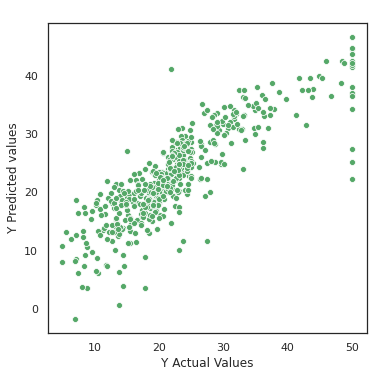

Custom SGDRegressor


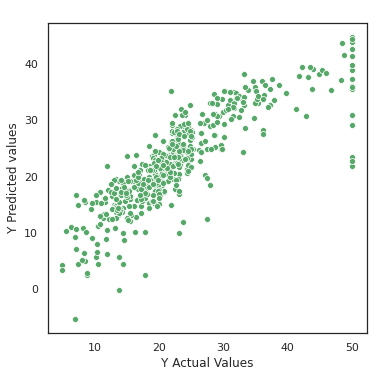

In [ ]:
import seaborn as sns
sns.set(style="white", color_codes=True)

print('SkLearn SGDRegressor')

grid = sns.JointGrid(Y, clf.predict(X), space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g")
plt.xlabel("Y Actual Values")
plt.ylabel("Y Predicted values")
plt.show()

print('Custom SGDRegressor')

grid = sns.JointGrid(Y, clf_Own.predict(X), space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g")
plt.xlabel("Y Actual Values")
plt.ylabel("Y Predicted values")
plt.show()


In [ ]:
x = PrettyTable()

x.field_names = ["Implementation","MSE", "Weights"]

x.add_row(["SKLearn SGDRegresser", MSE_Own,W_Own])
x.add_row(["Own SGDRegresser", MSE_SK, W_SK])


print(x)

+----------------------+--------------------+--------------------------------------------------------------------------+
|    Implementation    |        MSE         |                                 Weights                                  |
+----------------------+--------------------+--------------------------------------------------------------------------+
| SKLearn SGDRegresser | 23.357271081718803 | [-1.52905249  1.50003763 -0.65093353  0.18767256 -1.83510079  2.85832822 |
|                      |                    |  -0.03796133 -2.97016679  1.83269596 -1.11302414 -1.94848514  0.36924265 |
|                      |                    |                               -3.27025186]                               |
|   Own SGDRegresser   | 22.826342096650734 | [-0.59281721  0.91821328  0.03196809  1.06527052 -2.27663127  3.3620858  |
|                      |                    |  -0.04924001 -3.17398408  2.65092003 -1.96118207 -1.94617025  0.4749296  |
|                      |        